In [2]:
from standardInclude import *

In [4]:
f = r.TFile("./lostMuons_WithPreliminaryCorrection.root") #1 file with run3 templates
f.cd("lostMuonTree")
f.ls()

t = f.Get("lostMuonTree/lostMuonCoincidences")
#t.Print()

TFile**		./lostMuons_WithPreliminaryCorrection.root	
 TFile*		./lostMuons_WithPreliminaryCorrection.root	
  TDirectoryFile*		lostMuonTree	lostMuonTree (LostMuonTree) folder
   KEY: TTree	lostMuonCoincidences;1	lostMuonCoincidences
  KEY: TDirectoryFile	lostMuonTree;1	lostMuonTree (LostMuonTree) folder


174.7527378948479


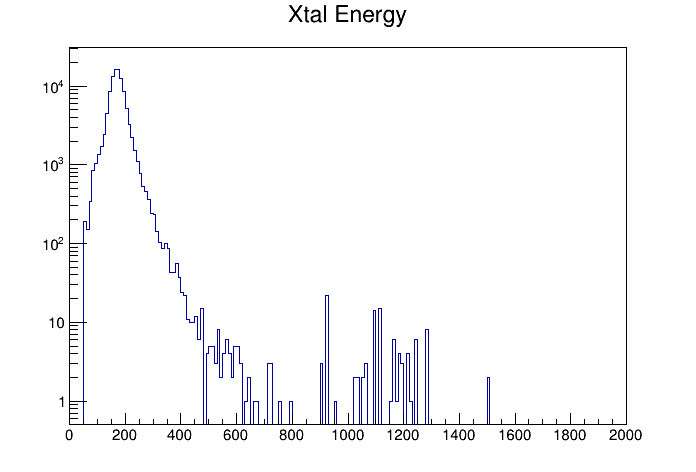

In [7]:
c = r.TCanvas()
h = r.TH1D("h","Xtal Energy",200,0,2000)
t.Draw("xtalEnergy>>h","nHit == 1")
print(h.GetMean())
c.SetLogy()
c.Draw()

In [8]:
#cutString = "coinNum == 1 && nHit == 1" #original
#cutString = "coinNum == 1 && nHit == 1"
cutString = "coinNum > 0 && coinNum < 4 && nHit == 1"

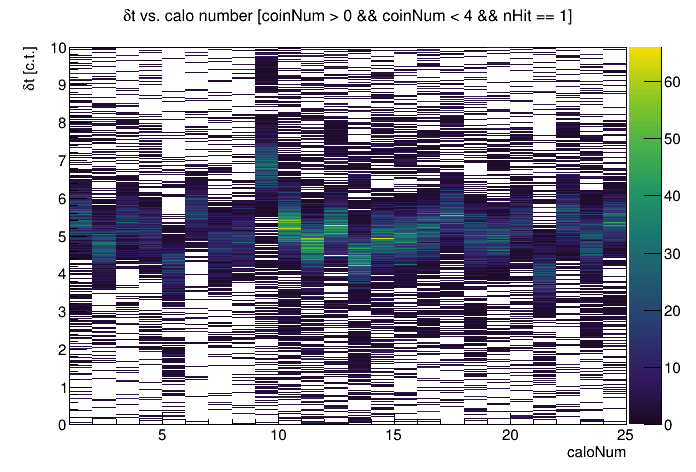

In [9]:
c = r.TCanvas()
deltaTCalos = r.TH2D("deltaTCalos","#deltat vs. calo number ["+str(cutString)+"]; caloNum; #deltat [c.t.]", 24,1,25,1000,0,10)
t.Draw("deltaT:caloNum>>deltaTCalos",cutString,"goff")
deltaTCalos.Draw("colz")
c.Draw()

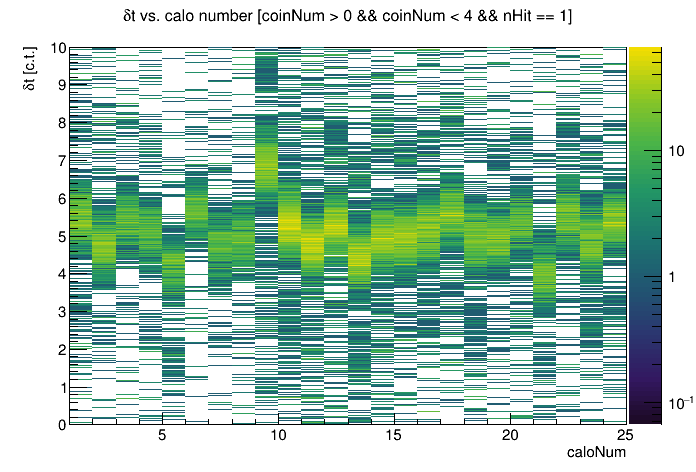

In [10]:
c = r.TCanvas()
deltaTCalos.Draw("colz")
c.Draw()
c.SetLogz()

#c.Print("./deltaTCalos.root")

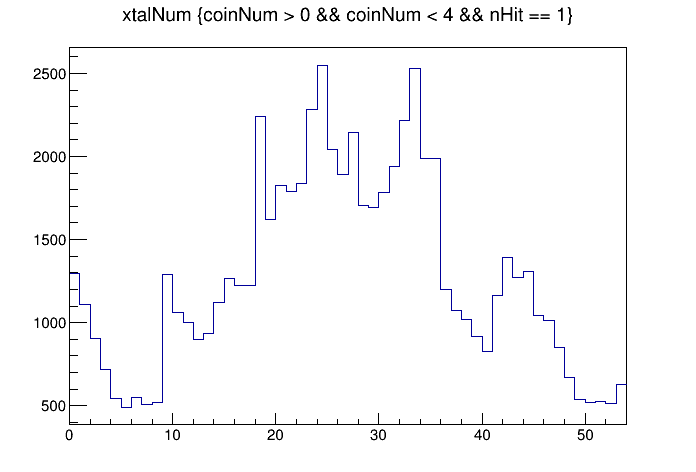

In [11]:
c = r.TCanvas()
t.Draw("xtalNum>>hist(54,0,54)", cutString)
c.Draw()

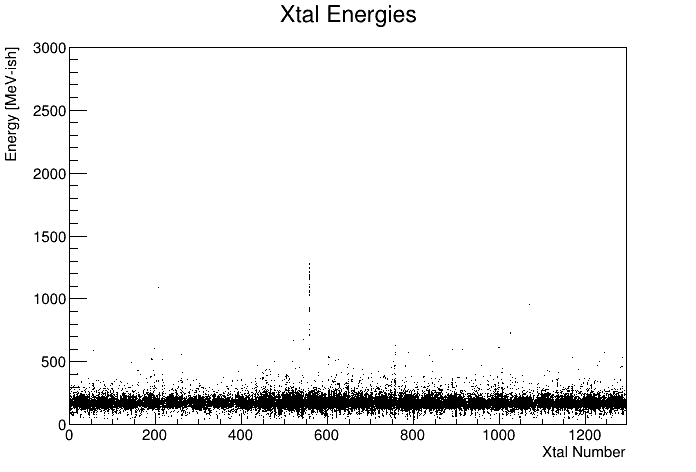

In [18]:
getHistFromFile = False

if(getHistFromFile):
    fhist = r.TFile("./data/xtalEnergy_vs_XtalNum_ForEnergyCalibration.root")
    c = fhist.Get("c1")
    allEnergies = c.GetPrimitive("energyXtal").Clone("energyXtal")
    allEnergies.SetDirectory(0)
else:
    allEnergies = r.TH2D("energyXtal","Xtal Energies; Xtal Number; Energy [MeV-ish]", 1296,-0.5,1295.5,400,0.0,3000.0)
    t.Draw("xtalEnergy:(caloNum-1)*54 + xtalNum>>energyXtal",cutString,"goff")

c = r.TCanvas()
allEnergies.Draw()
c.Draw()

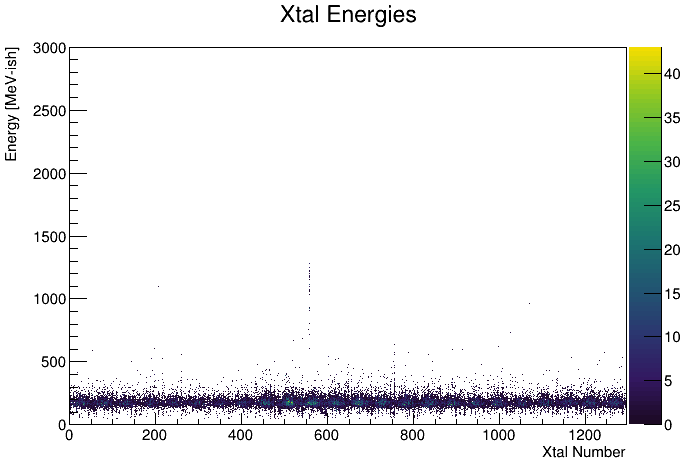

In [19]:
allEnergies.Draw("colz")
c.Draw()

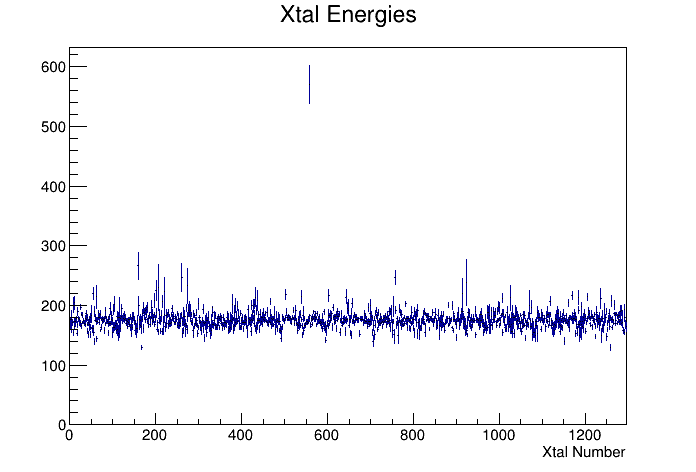

In [22]:
allEnergies.ProfileX().Draw("colz")
c.Draw()

In [20]:
projHist = allEnergies.ProjectionY("_py"+str(1),1,-1,"").Clone()
#projHist->Add(allEnergies.at(0)->ProjectionY(Form("_py%i",0),1,-1,""));
#projHist->Add(allEnergies.at(2)->ProjectionY(Form("_py%i",2),1,-1,""));
tempMean = projHist.GetMean()
tempSig = projHist.GetRMS()
binmax = projHist.GetMaximumBin()
peak = projHist.GetXaxis().GetBinCenter(binmax)
projHist.Fit("gaus","Q","",peak-75, peak+75)

targetE = 170.
avgPeak = peak;

scaleFactor = targetE / projHist.GetFunction("gaus").GetParameter(1)
print( "average calibration constant is : " , scaleFactor )

average calibration constant is :  0.987007148901792


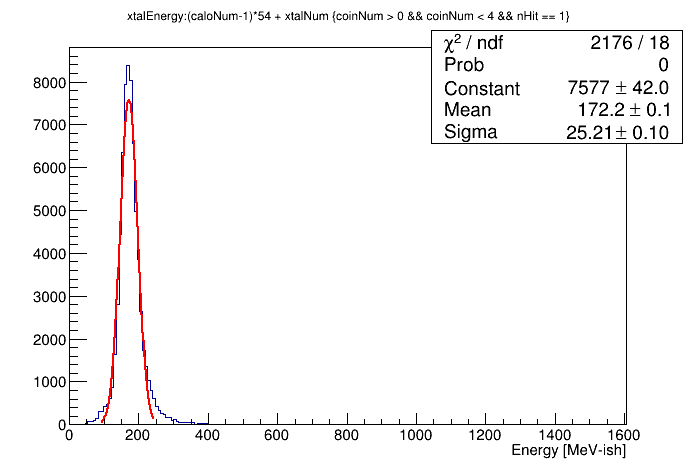

In [21]:
c = r.TCanvas()
projHist.Draw()
projHist.GetXaxis().SetRangeUser(0,1600)
#c.SetLogy()
c.Draw()